In [2]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from pylab import *
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
#import seaborn as sns
# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times'], 'size': 15})
# rc('text', usetex=True)      

import matplotlib.patheffects as patheffects
from matplotlib import rcParams

# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
#rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 15
rcParams['axes.labelsize'] = 15
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 13
rcParams['figure.titlesize'] = 1

# SMALL_SIZE = 13
# MEDIUM_SIZE = 15
# BIGGER_SIZE = 17

# plt.rc('font', size=SMALL_SIZE) 
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
os.chdir('/Users/nitya/Work/Paper1/data')

Two ways to do this:

1. Keep the binning. Leave out 10% of the entire sample and re-calculate the 2 distirubutions for the 3 sets of populations; Multiple iterations: get a delta; and then find a way to propogate it for the re-weighting. (sqrt(delta_x^2 + delta_y^2)?)
2. Unwrap the binning; Leave out 10% of the sample and rebin; Now re-sample the same way above...


How I could possibly write code to do this...:
1. Function for Re-sampling(leaving out 10%?):... get a matrix where each row is a different sampling?
2. Function for plotting patches and picking out the points in them
3. Function to unwrap and get the distribution(s)' variance?





In [3]:
file_beta = open(r'binned_data.pkl', 'rb')
q = pickle.load(file_beta, encoding ='latin1')
file_beta.close()
print(q.dtype.names)


filebins = open(r'binned_counts_idlist.pkl', 'rb')
dat = pickle.load(filebins)
filebins.close()

all_data = open(r'interpolated_data.pkl', 'rb')
g = pickle.load(all_data)
all_data.close()
print(g.dtype.names)

('bin', 'opt', 'inf', 'mass', 'logmass', 'magsfr', 'magphys', 'uvsfr', 'uv', 'env', 'counts')
('nsaid', 'z', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env')


In [4]:
counts = q['counts']
print(len(counts))
ind = np.where(counts>=5)[0]
print(len(q[ind]))

d = q[ind]
data = np.column_stack((q['magphys'][ind],q['uv'][ind]))
dat = dat[ind]

444
317


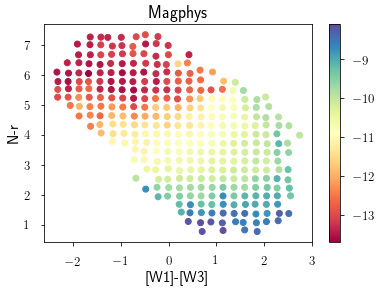

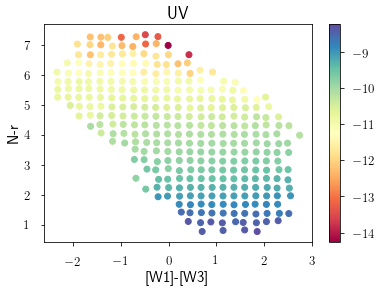

In [5]:
plt.scatter(q['inf'][ind],q['opt'][ind],c = q['magphys'][ind], cmap = plt.cm.Spectral)
plt.ylabel('N-r')
plt.xlabel('[W1]-[W3]')
plt.title('Magphys')
plt.colorbar()
plt.show()

plt.scatter(q['inf'][ind],q['opt'][ind],c = q['uv'][ind], cmap = plt.cm.Spectral)
plt.ylabel('N-r')
plt.xlabel('[W1]-[W3]')
plt.title('UV')
plt.colorbar()
plt.show()

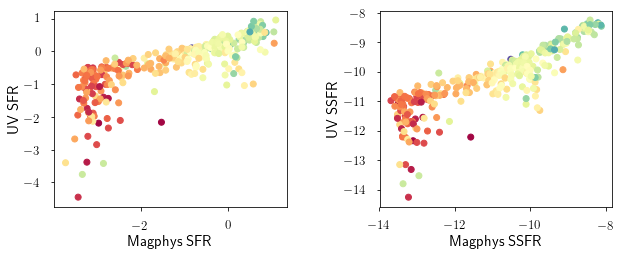

In [6]:

f = plt.figure(figsize=(10,4)) 
ax = [f.add_subplot(1,2,i+1) for i in range(2)]
f.subplots_adjust(wspace=0.4, hspace = 1)

ax1 = ax[0]
ax2 = ax[1]
cs3 = ax1.scatter(q['magsfr'][ind],q['uvsfr'][ind],c = np.log10(q['env'][ind]), cmap = plt.cm.Spectral_r)
ax1.set_ylabel('UV SFR')
ax1.set_xlabel('Magphys SFR')
#plt.colorbar(cs3)

cs4 = ax2.scatter(q['magphys'][ind],q['uv'][ind],c = np.log10(q['env'][ind]), cmap = plt.cm.Spectral_r)
ax2.set_ylabel('UV SSFR')
ax2.set_xlabel('Magphys SSFR')
# cbar_ax3 = f.add_axes([0.14, 0.01, 0.33, 0.015])
# cb3 = f.colorbar(cs3,orientation = 'horizontal', cax=cbar_ax3)
# cb3.ax.tick_params(labelsize=7)
#plt.colorbar(cs4)
plt.gcf().subplots_adjust(bottom = 0.2)
plt.savefig('Outliers.pdf')
#plt.colorbar(cs4)
plt.show()


In [7]:

ve1 = [(-10.25, -9.9), (-10.25, -11.5),(-8.9,-11.5),(-8.9,-9.9),(-10.25, -9.9)]
ve2 = [(-10.25, -8.2), (-10.25, -9.9), (-8.9, -9.9),(-8.9,-8.2),(-10.25, -8.2)]
ve3 = [(-13.7, -9.9),(-13.7, -11.5), (-10.25, -11.5),(-10.25,-9.9),(-13.7, -9.9)]

(23,)
(63,)
(145,)


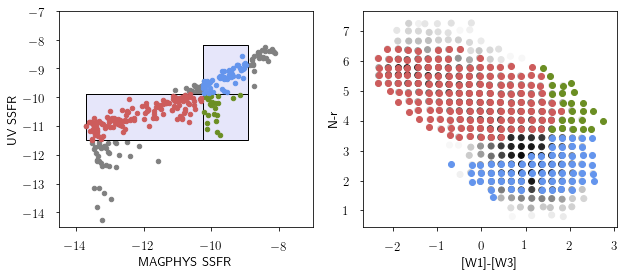

In [8]:
p1 = Path(ve1)
in1 = p1.contains_points(data)
bo1 = d[in1]
print(np.shape(bo1))
p2 = Path(ve2)
in2 = p2.contains_points(data)
bo2 = d[in2]
print(np.shape(bo2))
p3 = Path(ve3)
in3 = p3.contains_points(data)
bo3 = d[in3]
print(np.shape(bo3))

# x = [-15.0, -12.0, -7.0]
# y = [-15.0, -12.0, -7.0]

# m = 0.50
# c = 4.5

# y2 = [m*x[i] - c for i in range(len(x))]

patch1 = patches.PathPatch(p1, facecolor='lavender', lw=1)
patch2 = patches.PathPatch(p2, facecolor='lavender', lw=1)
patch3 = patches.PathPatch(p3, facecolor='lavender', lw=1)

f = plt.figure(figsize=(10,4)) 
ax = [f.add_subplot(1,2,i+1) for i in range(2)]
#f.subplots_adjust(wspace=1, hspace = 1)

ax1 = ax[0]
ax2 = ax[1]

cs1 = ax1.scatter(data[:,0],data[:,1], color = 'grey',s = 20)
ax1.add_patch(patch1)
ax1.add_patch(patch2)
ax1.add_patch(patch3)
ax1.scatter(data[in1,0], data[in1,1], color = 'olivedrab',s = 20, zorder = 2)
ax1.scatter(data[in3,0], data[in3,1],color = 'indianred',s = 20, zorder = 2)
ax1.scatter(data[in2,0], data[in2,1],color = 'cornflowerblue',s = 20, zorder = 2)
#ax1.plot(x,y, color = 'y', linestyle = '--')
#ax1.plot(x,y2, color = 'y', linestyle = '--')
ax1.plot

ax1.set_xlim(-14.5,-7.0)
ax1.set_ylim(-14.5,-7.0)
ax1.set_xlabel('MAGPHYS SSFR', fontsize = 13)
ax1.set_ylabel('UV SSFR', fontsize = 13)

cs2 = ax2.scatter(d['inf'],d['opt'],c = np.log10(d['counts']), cmap = plt.cm.gray_r )
cs2a = ax2.scatter(bo1['inf'],bo1['opt'], color = 'olivedrab')
cs2b = ax2.scatter(bo2['inf'],bo2['opt'], color = 'cornflowerblue')
cs2c = ax2.scatter(bo3['inf'],bo3['opt'], color = 'indianred')
ax2.set_xlabel('[W1]-[W3]', fontsize = 13)
ax2.set_ylabel('N-r', fontsize = 13)
# plt.colorbar(cs2)
plt.gcf().subplots_adjust(top=0.95, bottom = 0.2)
plt.savefig('green_points2.pdf')
plt.show()

In [9]:

def func(data,ve,dat):
    p = Path(ve)
    inside = p.contains_points(data)
    #print(len(data[inside]))
    h = dat[inside]
    ids = np.concatenate(h[:,2]).ravel()
    #print(len(ids))
    ind1 = np.in1d(g['nsaid'],ids)
    g1 = g[ind1]
    #print(len(g1))
    return g1

def masscut(array,mass,min,max):
    index1 = np.where(mass>=min)[0]
    array = array[index1]
    mass = mass[index1]
    index2 = np.where(mass<=max)[0]
    return array[index2]

    
#massbins
#envbins
massbins = np.linspace(9.5,10.7,7)
print(massbins)
envbins = np.linspace(0,1.5,4)
print(envbins)

[  9.5   9.7   9.9  10.1  10.3  10.5  10.7]
[ 0.   0.5  1.   1.5]


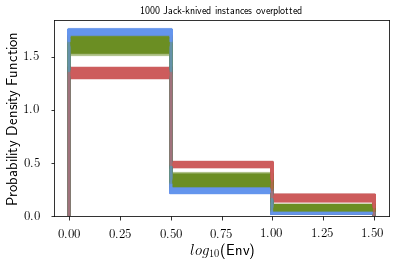

In [10]:
array1 =[]
array2 = []
array3 = []

for i in range(1000):
    x = np.random.choice(317,286)
    xy = data[x]
    new_dat = dat[x]
    g1 = func(xy,ve1,new_dat)
    g2 = func(xy,ve2,new_dat)
    g3 = func(xy,ve3,new_dat)
    g1 = masscut(g1,g1['mass'],9.5,10.7)
    g2 = masscut(g2,g2['mass'],9.5,10.7)
    g3 = masscut(g3,g3['mass'],9.5,10.7)
    mass1 = g1['mass'].reshape(len(g1),1)
    mass2 = g2['mass'].reshape(len(g2),1)
    mass3 = g3['mass'].reshape(len(g3),1)
    env1 = g1['env'].reshape(len(g1),1)
    env2 = g2['env'].reshape(len(g2),1)
    env3 = g3['env'].reshape(len(g3),1)
    a = plt.hist(np.log10(env1), bins=envbins, normed = 1, histtype = 'step', fill = False, alpha = 0.5,color = 'olivedrab',linewidth=2.2)
    b = plt.hist(np.log10(env2), bins=envbins, normed = 1, histtype = 'step', fill = False, alpha = 0.5,color = 'cornflowerblue', linewidth=2.2)
    c = plt.hist(np.log10(env3), bins=envbins, normed = 1, histtype = 'step', fill = False, alpha = 0.5,color = 'indianred',linewidth=2.2)
    array1.append(a[0])
    array2.append(b[0])
    array3.append(c[0])
    
plt.xlabel(r'$log_{10}$(Env)')
plt.ylabel('Probability Density Function')
plt.title('1000 Jack-knived instances overplotted', fontsize = 10)
plt.gcf().subplots_adjust(bottom = 0.2)
plt.savefig('Jackknife_trial.pdf')
plt.show()



    
    

In [11]:
g1 = func(data,ve1,dat)
g2 = func(data,ve2,dat)
g3 = func(data,ve3,dat)
g1 = masscut(g1,g1['mass'],9.5,10.7)
g2 = masscut(g2,g2['mass'],9.5,10.7)
g3 = masscut(g3,g3['mass'],9.5,10.7)
mass1 = g1['mass'].reshape(len(g1),1)
mass2 = g2['mass'].reshape(len(g2),1)
mass3 = g3['mass'].reshape(len(g3),1)
env1 = g1['env'].reshape(len(g1),1)
env2 = g2['env'].reshape(len(g2),1)
env3 = g3['env'].reshape(len(g3),1)


# print(len(g1),len(g2),len(g3))




In [12]:

plt.hist(mass1, bins=massbins, normed = 1, histtype = 'step', fill = False, color = 'olivedrab',linewidth=3.2)
plt.hist(mass2, bins=massbins, normed = 1, histtype = 'step', fill = False, color ='cornflowerblue',linewidth=3.2)
plt.hist(mass3, bins=massbins, normed = 1, histtype = 'step', fill = False, color = 'indianred',linewidth=3.2)
plt.xlabel('Mass')
plt.ylabel('Probability Density Function')
# plt.gcf().subplots_adjust(top=0.95, bottom = 0.2)
# plt.savefig('Mass.pdf')
# plt.show()

a = plt.hist(np.log10(env1), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'olivedrab',linewidth=3.2)
b = plt.hist(np.log10(env2), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'cornflowerblue', linewidth=3.2)
c = plt.hist(np.log10(env3), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'indianred',linewidth=3.2)
    
    
#plt.xscale('log')
#plt.yscale('log')
    plt.xlabel(r'$log_{10}$(Env)')
    plt.ylabel('Probability Density Function')
#plt.title(r'Environment Distribution for $9.5<log_{10}(M_{*})<=10.7$')
    plt.gcf().subplots_adjust(bottom = 0.1)



#a = corner.corner(mass1)
#a.savefig('trial2')
#a.show()

IndentationError: unexpected indent (<ipython-input-12-d115c200f5ea>, line 18)

In [ ]:
print(a[0],b[0],c[0])
print(a[1],b[1],c[1])